In [28]:
import random

# Read the words from the file
with open('overlapping_vocab.txt', 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

# Randomly select 10 words
random_words = random.sample(words, 4)
print(random_words)

['learning', 'أصلاً', 'تحديث', 'mechanics']


In [41]:
from gensim.models import Word2Vec

models = ["artificial_cbow.model", "natural_cbow.model", "artificial_sg.model", "natural_sg.model"]

with open('random_results.txt', 'w', encoding='utf-8') as file:
    for word in random_words:
        for model_name in models:
            model = Word2Vec.load(model_name)
            file.write(f"Model: {model_name}\n")
            similar_words = model.wv.most_similar(word, topn=50)

            file.write(f"Similar words to '{word}':\n")
            count = 0
            for similar_word, similarity in similar_words:
                if word not in words:
                    continue
                file.write(f"{similar_word}: {similarity}\n")
                count += 1
                if count == 10:
                    break
            file.write("\n")

In [46]:
import itertools
from tqdm import tqdm

# Randomly sample 5 pairs of words
word_pairs = random.sample(list(itertools.combinations(words, 2)), 200)

natural = []
artificial = []

real_models = []

for model_name in models:
    model = Word2Vec.load(model_name)
    real_models.append(model)

# Calculate distances for each model
with open('pairwise_similarity.txt', 'w', encoding='utf-8') as file:
    for word1, word2 in tqdm(word_pairs):
        file.write(f"Word Pair: ({word1}, {word2})\n")
        for model_name, model in zip(models, real_models):
            model = Word2Vec.load(model_name)
            similarity = model.wv.similarity(word1, word2)
            file.write(f"Model: {model_name}, Similarity: {similarity}\n")
            if "natural" in model_name:
                natural.append(similarity)
            else:
                artificial.append(similarity)
        file.write("\n")

100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


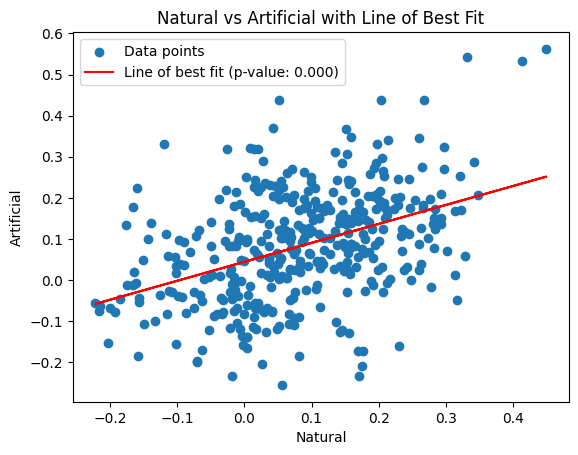

In [44]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(natural, artificial, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(natural, artificial)
line = slope * np.array(natural) + intercept
plt.plot(natural, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f})')

# Labels and title
plt.xlabel('Natural')
plt.ylabel('Artificial')
plt.title('Natural vs Artificial with Line of Best Fit')
plt.legend()

# Show plot
plt.show()